# **Kurtosis and Skewness**


> **Skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined.

The formula for skewness is:

$g_1 = E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right]$

Where:
- E is the expectation operator
- X is a random variable
- μ is the mean
- σ is the standard deviation

> **Kurtosis** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

The formula for kurtosis is:
$g_2 = E\left[\left(\frac{X - \mu}{\sigma}\right)^4\right] - 3$

Where:
- E is the expectation operator
- X is a random variable
- μ is the mean
- σ is the standard deviation

Note: The "-3" at the end of the formula is often used to compare the kurtosis of a given distribution to that of a normal distribution (which has a kurtosis of 3).

**Types of Kurtosis:**
1. **Mesokurtic** (Normal Distribution):
A mesokurtic distribution has kurtosis equal to 0, indicating that its tails have a similar shape to a normal distribution.
2. **Leptokurtic** (Heavy-Tailed):
A leptokurtic distribution has positive kurtosis, indicating heavier tails and a more peaked central portion compared to a normal distribution. This implies more extreme values.
3. **Platykurtic** (Light-Tailed):
A platykurtic distribution has negative kurtosis, indicating lighter tails and a flatter central portion compared to a normal distribution. This implies fewer extreme values.

**Interpretation:**
- `Kurtosis = 0` (Normal Distribution): Similar tails as a normal distribution.
- `Kurtosis > 0` (Leptokurtic): Heavier tails, more data in the tails.
- `Kurtosis < 0` (Platykurtic): Lighter tails, less data in the tails.


In [2]:
#1 Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# load titanic data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='fare', ylabel='Count'>

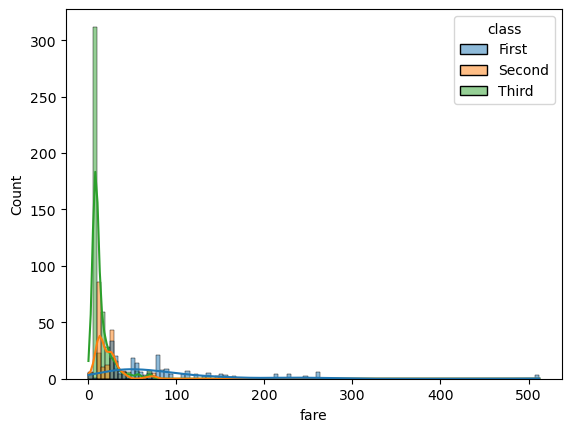

In [4]:
sns.histplot(data= df, x = 'fare', kde=True, hue='class')

In [5]:
stats.kurtosis(df['fare'], fisher=False) # find kurtosis of fare column

36.20428925264474

#### **Observations:**
- output = `36.20428925264474` (positive kurtosis) = leptokurtic distribution (heavy tails) 
- which indicates more outliers than normal distribution 

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='age', ylabel='Count'>

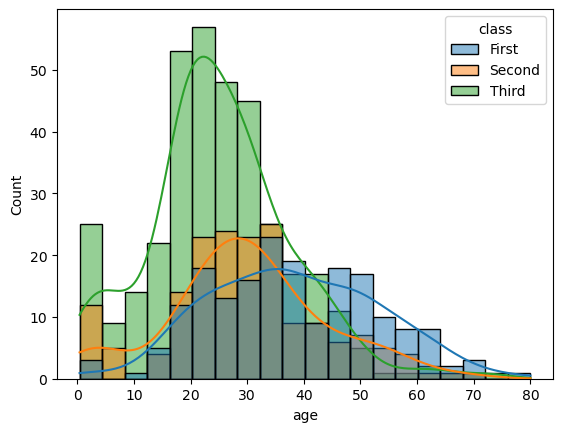

In [6]:
sns.histplot(data= df, x = 'age', kde=True, hue='class')

In [7]:
# find kurtosis of age for 'Second' class
df_02 = df[df['class'] == 'Second']   # filter data for 'Second' class
stats.kurtosis(df_02['age'], fisher=False) # find kurtosis of age for 'Second' class


nan

#### **Observations:** 
- output = '`nan`' (not a number) means that the kurtosis is undefined for this distribution
- If the output is 'nan', it could mean that there are missing values in the 'age' column for the 'Second' class. 
- These missing values might need to be handled before calculating the kurtosis.
- Not a normal distribution
- This is because the **sample size is too small** (n=184) to calculate kurtosis for this distribution

In [8]:
stats.skew(df_02['fare'])

2.0211302857531384

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

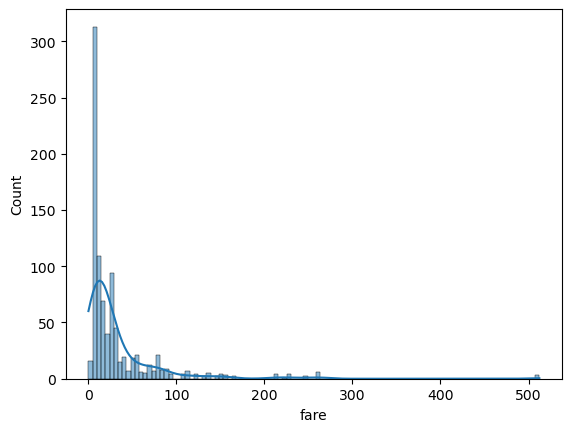

In [9]:
sns.histplot(df, x = 'fare', kde=True)

In [10]:
import numpy as np
from scipy.stats import skew, kurtosis

# Generating example data
np.random.seed(0)
data = np.random.normal(0, 1, 1000)  # Normal distribution

# Calculating skewness and kurtosis
data_skewness = skew(data)
data_kurtosis = kurtosis(data, fisher=True)  # 'fisher=True' gives the excess kurtosis

# Displaying the results
print(f"Skewness of the dataset: {data_skewness}")
print(f"Kurtosis of the dataset: {data_kurtosis}")

Skewness of the dataset: 0.03385895323565712
Kurtosis of the dataset: -0.0467663244783294


c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

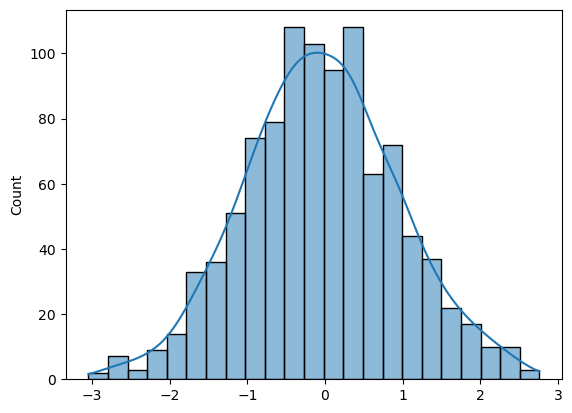

In [11]:
sns.histplot(data, kde=True)

#### **How to test the normal distribution of the data?**

"`H0:Data is normally distributed`" refers to the null hypothesis. In the context of testing for normality, the null hypothesis assumes that the data follows a normal distribution.

"`H1: data is not normally distributed`" refers to the alternative hypothesis. This is what you might believe to be true if the evidence (data) suggests that the null hypothesis can be rejected. In this case, the alternative hypothesis is that the data does not follow a normal distribution.

To test these hypotheses, you would typically use a statistical test that checks for normality, such as: 
1. **The Shapiro-Wilk test**
2. **The Anderson-Darling test**
3. **Kolmogorov-Smirnov test**
4. **D'Agostino's K^2 Test** 
These tests compare your data to a normal distribution and return a `p-value`. 
- If the p-value is `less than` a chosen significance level (often `0.05`), you `reject` the null hypothesis in favor of the alternative hypothesis. 
- If the p-value is `greater than` the significance level, you `do not reject` the null hypothesis.

#### **1. The Shapiro-Wilk Test:**

In [12]:
# how to test the normal distribution of the data

# H0: data is normally distributed
# H1: data is not normally distributed

# shpiro wilk
# D'Agostino's K^2 Test
# Anderson-Darling Test

In [13]:
# shapiro wilk test to test the normality of the data
stats.shapiro(data)
print(f"Shapiro-Wilk test statistic: {stats.shapiro(data)[0]}") # output = 0.9985560774803162
print(f"Shapiro-Wilk test p-value: {stats.shapiro(data)[1]}")   # output = 0.5916484594345093

Shapiro-Wilk test statistic: 0.9985560774803162
Shapiro-Wilk test p-value: 0.5916484594345093


#### **Observations:**
- The code is performing a Shapiro-Wilk test, which is a statistical test to check if the data is normally distributed.
- The `stats.shapiro(data)` function is used to perform the test. It returns two values: the test statistic and the p-value.
- The test statistic is printed with `print(f"Shapiro-Wilk test statistic: {stats.shapiro(data)[0]}")`. The output is 0.9985560774803162. A value close to 1 suggests that the data follows a normal distribution.
- The p-value is printed with `print(f"Shapiro-Wilk test p-value: {stats.shapiro(data)[1]}")`. The output is 0.5916484594345093. A p-value greater than 0.05 indicates that we cannot reject the null hypothesis that the data is normally distributed. In this case, the data appears to be normally distributed.

#### **2. The Anderson-Darling Test:**
The Anderson-Darling test is a statistical test that can be used to determine whether a data sample comes from a specific population. 
In other words, it's a test of goodness of fit. It is often used to check whether a data sample is normally distributed.

The Anderson-Darling test gives more weight to the tails than the Kolmogorov-Smirnov test. This makes it more appropriate for many applications where the tail behavior is crucial.

**Here's how you can perform the Anderson-Darling test in Python using the `scipy` library:**

In [14]:
from scipy import stats

# Assuming data is your data sample
result = stats.anderson(data, dist='norm')

print(f'Anderson-Darling test statistic: {result.statistic}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'At significance level {sl}, data looks normal (fail to reject H0)')
    else:
        print(f'At significance level {sl}, data does not look normal (reject H0)')

Anderson-Darling test statistic: 0.2432179174634257
At significance level 15.0, data looks normal (fail to reject H0)
At significance level 10.0, data looks normal (fail to reject H0)
At significance level 5.0, data looks normal (fail to reject H0)
At significance level 2.5, data looks normal (fail to reject H0)
At significance level 1.0, data looks normal (fail to reject H0)




This code performs the Anderson-Darling test on the data sample and prints the test statistic. It then checks the test statistic against the critical values at different significance levels to determine whether the data is normally distributed.

#### **3. Kolmogorov-Smirnov Test:**
The Kolmogorov-Smirnov test (K-S test) is a nonparametric test that compares a sample with a reference probability distribution (one-sample K-S test), or compares two samples (two-sample K-S test). It's often used to test whether a dataset is normally distributed.

**Here's how you can perform the one-sample Kolmogorov-Smirnov test in Python using the `scipy` library to check if a dataset is normally distributed:**

In [15]:
from scipy import stats

# Assuming data is your data sample
# Compute the mean and standard deviation of the data
mu, sigma = data.mean(), data.std()

# Perform the Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = stats.kstest((data - mu) / sigma, 'norm')

print(f'Kolmogorov-Smirnov test statistic: {ks_statistic}')
print(f'Kolmogorov-Smirnov test p-value: {ks_pvalue}')

Kolmogorov-Smirnov test statistic: 0.01903411267034605
Kolmogorov-Smirnov test p-value: 0.8547733408587939


- This code first calculates the mean and standard deviation of the data. It then performs the Kolmogorov-Smirnov test on the standardized data (data minus mean divided by standard deviation) and compares it to a standard normal distribution ('norm'). 
- The test returns a test statistic and a p-value. If the p-value is less than a chosen significance level (often 0.05), you reject the null hypothesis that the data is normally distributed.

#### **4. D'Agostino's K^2 Test:**
- D'Agostino's K^2 test is a statistical test that checks whether a distribution is normally distributed. 
- This test is based on transformations of the sample kurtosis and skewness, and hence this test is also known as a test of skewness and kurtosis.

**Here's how you can perform D'Agostino's K^2 test in Python using the `scipy` library:**

In [16]:
from scipy import stats

# Assuming data is your data sample
k2, p = stats.normaltest(data)

print(f"D'Agostino's K^2 test statistic: {k2}")
print(f"D'Agostino's K^2 test p-value: {p}")

D'Agostino's K^2 test statistic: 0.2329889638562599
D'Agostino's K^2 test p-value: 0.8900350082402695




This code performs D'Agostino's K^2 test on the data sample and prints the test statistic and the p-value. If the p-value is less than a chosen significance level (often 0.05), you reject the null hypothesis that the data is normally distributed.